Load data

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


# Load the reduced MNIST digits dataset
digits = datasets.load_digits()

# Get the data and target labels
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset information
print("Training data shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing target shape:", y_test.shape)

Training data shape: (1437, 64)
Training target shape: (1437,)
Testing data shape: (360, 64)
Testing target shape: (360,)


Implement kNN classification for the above dataset.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Initialize the kNN classifier with a specific k value
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9833333333333333


Compute and plot the accuracy scores by k values.

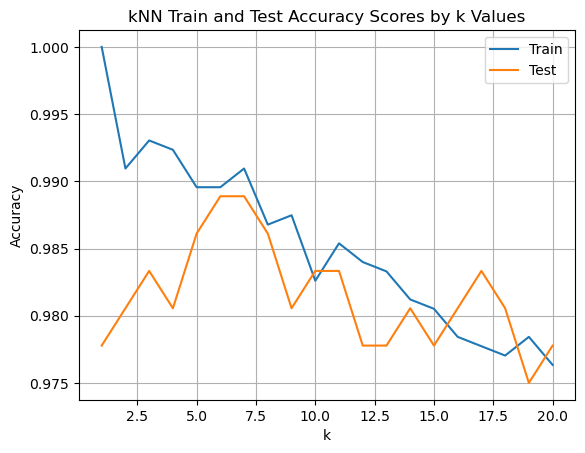

In [16]:
import matplotlib.pyplot as plt

# Define the range of k values
k_values = list(range(1, 21))
train_accuracy_scores = []
test_accuracy_scores = []

# Compute accuracy scores for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Train accuracy
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(train_accuracy)
    
    # Test accuracy
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_scores.append(test_accuracy)

# Plot the train and test accuracy scores by k values
plt.plot(k_values, train_accuracy_scores, label='Train')
plt.plot(k_values, test_accuracy_scores, label='Test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kNN Train and Test Accuracy Scores by k Values')
plt.legend()
plt.grid()
plt.show()

Make conclusions about which k is the best.

6
This k value provides a balance between train and test accuracies which is highest test accuracy and lower train accuracy.The higher train accuracy would cause overfitting.